In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cosmetics-datasets/cosmetics.csv


# Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/cosmetics-datasets/cosmetics.csv')

In [4]:
# Display the first few rows of the dataset
df.head(5)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [5]:
df.sample(5)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
73,Moisturizer,ESTÉE LAUDER,Revitalizing Supreme Global Anti-Aging Crème,82,4.4,Revitalizing Supreme+ Cell Pwr Crm Division: E...,0,0,0,0,0
340,Cleanser,CAUDALIE,Moisturizing Toner,28,4.4,"Water, Butylene Glycol, Peg-40 Hydrogenated Ca...",1,1,1,1,1
606,Treatment,FIRST AID BEAUTY,Facial Radiance Pads,30,4.3,"Water, Aloe Barbadensis Leaf Juice, Glycerin, ...",1,1,1,1,1
635,Treatment,FRESH,Rose Deep Hydration Face Serum,48,4.3,"Water, Glycerin,Propanediol, Maris Aqua (Sea W...",0,0,0,0,0
435,Cleanser,CAUDALIE,Gentle Cleansing Milk,28,4.1,"Water, Cetearyl Isononanoate*, Butylene Glycol...",1,1,1,1,1


# Step 2: Exploring the Datadf.isnull().sum()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [7]:
df.columns

Index(['Label', 'Brand', 'Name', 'Price', 'Rank', 'Ingredients', 'Combination',
       'Dry', 'Normal', 'Oily', 'Sensitive'],
      dtype='object')

In [8]:
df.describe()

,Price,Rank,Combination,Dry,Normal,Oily,Sensitive
count,1472.000000,1472.000000,1472.00000,1472.000000,1472.000000,1472.000000,1472.000000
mean,55.584239,4.153261,0.65625,0.614130,0.652174,0.607337,0.513587
std,45.014429,0.633918,0.47512,0.486965,0.476442,0.488509,0.499985
min,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,42.500000,4.300000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,68.000000,4.500000,1.00000,1.000000,1.000000,1.000000,1.000000
max,370.000000,5.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

In [10]:
df[df.duplicated()]

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive


In [11]:
df.shape

(1472, 11)

# 1. Total Brands Names

In [12]:
df["Brand"].unique()

array(['LA MER', 'SK-II', 'DRUNK ELEPHANT', 'IT COSMETICS', 'TATCHA',
       "KIEHL'S SINCE 1851", 'FRESH', 'BELIF', 'SUNDAY RILEY', 'FARMACY',
       'FIRST AID BEAUTY', 'CLINIQUE', 'BAREMINERALS', 'SHISEIDO',
       'CHARLOTTE TILBURY', 'ORIGINS', 'OLEHENRIKSEN', 'JOSIE MARAN',
       'FARSÁLI', 'LANEIGE', 'DR. JART+', 'GLOW RECIPE', 'HERBIVORE',
       'TARTE', 'CAUDALIE', 'YOUTH TO THE PEOPLE', 'BIOSSANCE',
       'ESTÉE LAUDER', 'SON & PARK', 'AMOREPACIFIC', 'BOBBI BROWN',
       'ERBORIAN', 'SMASHBOX', 'GLAMGLOW', 'PETER THOMAS ROTH',
       'JACK BLACK', 'PHILOSOPHY', 'PERRICONE MD', 'LANCÔME', 'ALGENIST',
       'MAKE UP FOR EVER', 'KORRES', 'MURAD', 'GUERLAIN', 'DIOR',
       'KORA ORGANICS', 'DR. DENNIS GROSS SKINCARE', 'REN CLEAN SKINCARE',
       'KOPARI', 'CLARINS', 'NURSE JAMIE', 'LANCER', "L'OCCITANE",
       'KATE SOMERVILLE', 'SUPERGOOP!', 'SATURDAY SKIN',
       'SEPHORA COLLECTION', 'MILK MAKEUP', 'DR. BRANDT SKINCARE',
       'J.ONE', 'KAT VON D', 'TATA HARPER', 'GO

# 2. Total Brands

In [13]:
total_brands_count = len(df["Brand"].unique())
total_brands_count

116

# 3. Total Labels

In [14]:
total_Labels_count = len(df["Label"].unique())
total_Labels_count

6

# 4. All Labels Names

In [15]:
unique_labels = df["Label"].unique()
print("Unique Labels:", unique_labels)

Unique Labels: ['Moisturizer' 'Cleanser' 'Treatment' 'Face Mask' 'Eye cream'
 'Sun protect']


# 5.the brand with the highest price

In [16]:
max_price_brand = df.loc[df["Price"].idxmax(), "Brand"]
print("Brand with the highest price:", max_price_brand)

Brand with the highest price: LA MER


# 6.the Label with the highest price

In [17]:
max_price_Label = df.loc[df["Price"].idxmax(), "Label"]
print("label with the highest price:", max_price_Label)

label with the highest price: Treatment


# 7.the brand with the highest Rating

In [18]:
print("Brand with the highest rating:", df.loc[df["Rank"].idxmax(), "Brand"])

Brand with the highest rating: LA MER


# 8. Number of brands suitable for all skin type


In [19]:
all_skin_types_count = df[(df["Combination"] == 1) & 
                          (df["Dry"] == 1) & 
                          (df["Normal"] == 1) & 
                          (df["Oily"] == 1) & 
                          (df["Sensitive"] == 1)]["Brand"].nunique()

print("Number of brands suitable for all skin types:", all_skin_types_count)



Number of brands suitable for all skin types: 91


# 9 Top 5 highest-ranked brands

In [20]:
top_5_highest_rank_brands = df.sort_values(by="Rank", ascending=False).head(5)["Brand"]
print("Top 5 highest-ranked brands:", top_5_highest_rank_brands.tolist())

Top 5 highest-ranked brands: ['BIOEFFECT', 'SEPHORA COLLECTION', 'PERRICONE MD', 'FOREO', 'DIOR']


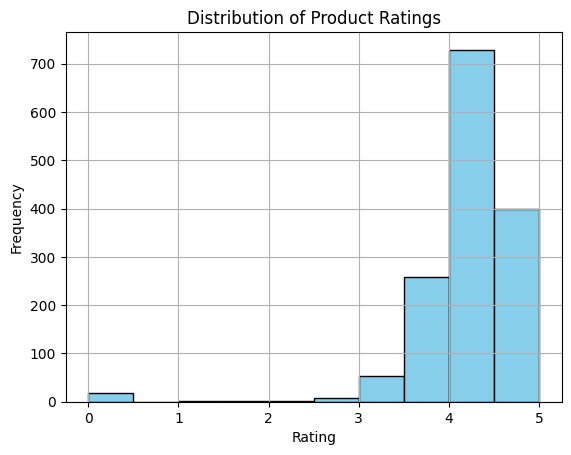

In [21]:

import matplotlib.pyplot as plt

# Plot histogram of product ratings
plt.hist(df["Rank"], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


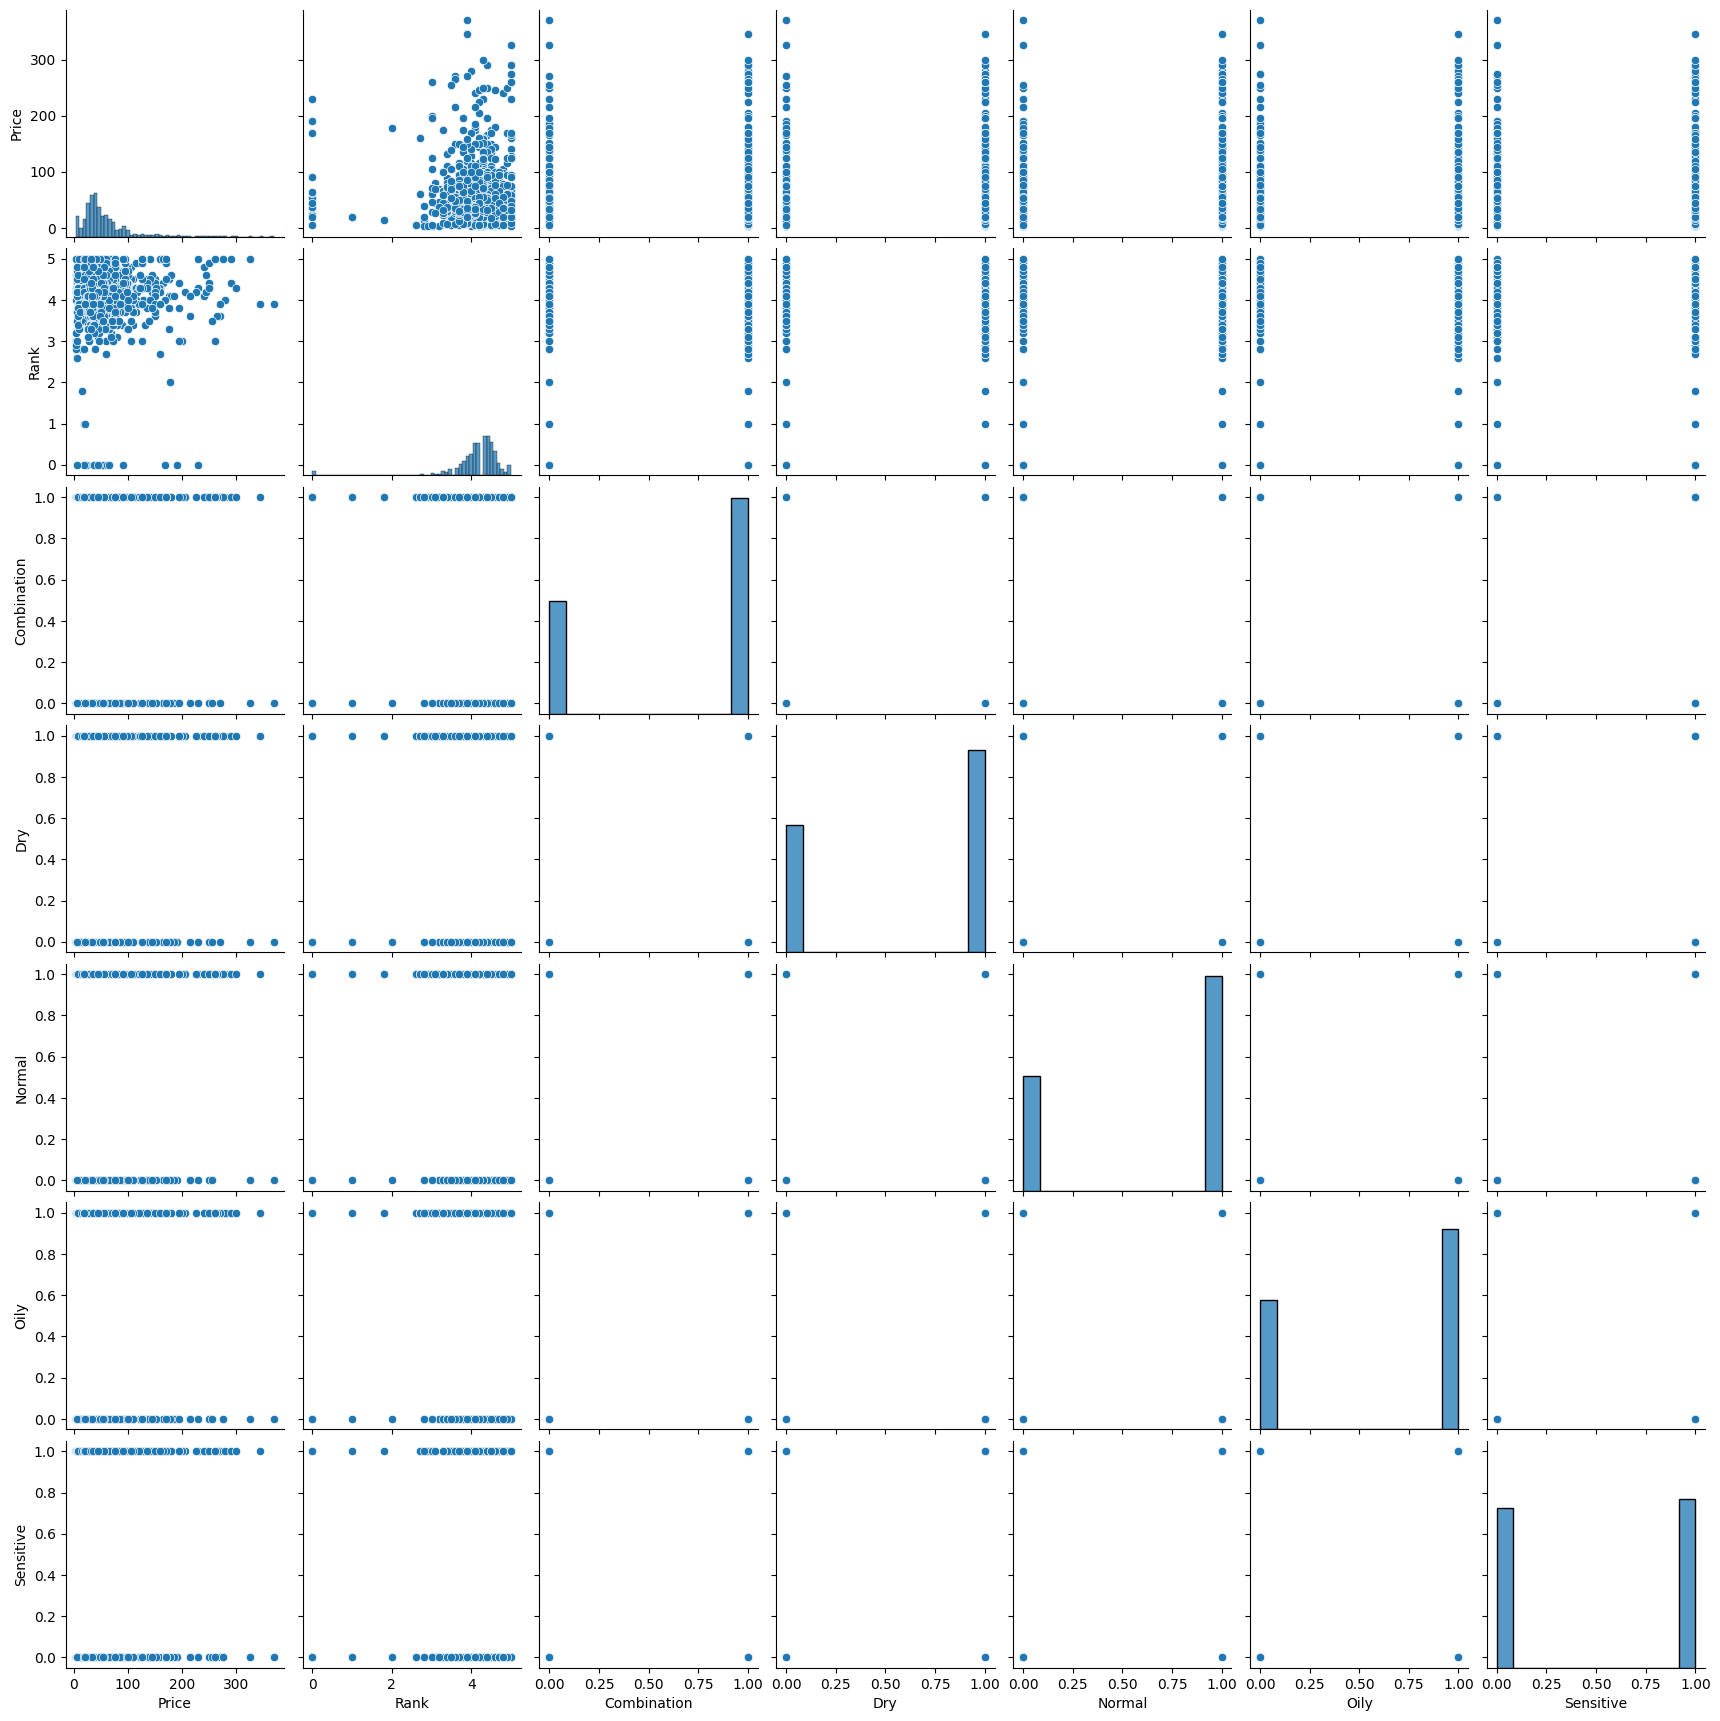

In [22]:
import seaborn as sns

# Selecting numerical columns for pair plot
numerical_columns = ['Price', 'Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']

# Creating pair plot
sns.pairplot(df[numerical_columns])
plt.show()

